# Optimization Methods: Practical Class with SciPy
## Course: DA5400W - Foundations of Machine Learning
### Instructor: Dr. Arun B Ayyar
### Indian Institute of Technology Madras

This notebook provides practical examples and implementations of optimization methods using SciPy. Each section mirrors the concepts from the lecture slides with additional examples to reinforce understanding.

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, LinearConstraint, Bounds
from scipy.optimize import linprog, minimize_scalar
from scipy.optimize import fminbound, brent
from scipy.optimize import least_squares
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

---
## Part 1: Fundamentals of Optimization

### 1.1 Linear Functions
A function f(x) is linear if it satisfies: **f(αx₁ + βx₂) = αf(x₁) + βf(x₂)**

Linear Function Verification:
f(αx₁ + βx₂) = 23.600000
αf(x₁) + βf(x₂) = 23.600000
Linearity satisfied: True



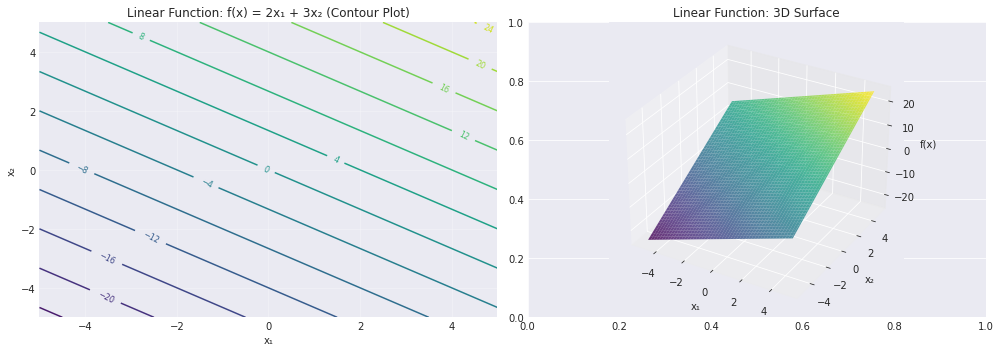

Linear functions form the basis of Linear Programming problems.


In [4]:
# Example 1.1: Linear Function
def linear_function(x, c):
    """Linear function: f(x) = c^T * x"""
    return np.dot(c, x)

# Test linearity property
c = np.array([2, 3, 1])  # Coefficient vector
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
alpha = 0.3
beta = 0.7

# Check linearity: f(αx₁ + βx₂) = αf(x₁) + βf(x₂)
lhs = linear_function(alpha * x1 + beta * x2, c)
rhs = alpha * linear_function(x1, c) + beta * linear_function(x2, c)

print("Linear Function Verification:")
print(f"f(αx₁ + βx₂) = {lhs:.6f}")
print(f"αf(x₁) + βf(x₂) = {rhs:.6f}")
print(f"Linearity satisfied: {np.isclose(lhs, rhs)}")
print()

# Additional example: 2D linear function visualization
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
c2d = np.array([2, 3])
Z = c2d[0] * X + c2d[1] * Y

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Contour plot
contour = ax1.contour(X, Y, Z, levels=15, cmap='viridis')
ax1.clabel(contour, inline=True, fontsize=8)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('Linear Function: f(x) = 2x₁ + 3x₂ (Contour Plot)')
ax1.grid(True, alpha=0.3)

# 3D surface plot
from mpl_toolkits.mplot3d import Axes3D
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_zlabel('f(x)')
ax2.set_title('Linear Function: 3D Surface')

plt.tight_layout()
plt.show()

print("Linear functions form the basis of Linear Programming problems.")

### 1.2 Convex Functions
A function f(x) is convex if: **f(λx₁ + (1-λ)x₂) ≤ λf(x₁) + (1-λ)f(x₂)**, for λ ∈ [0,1]

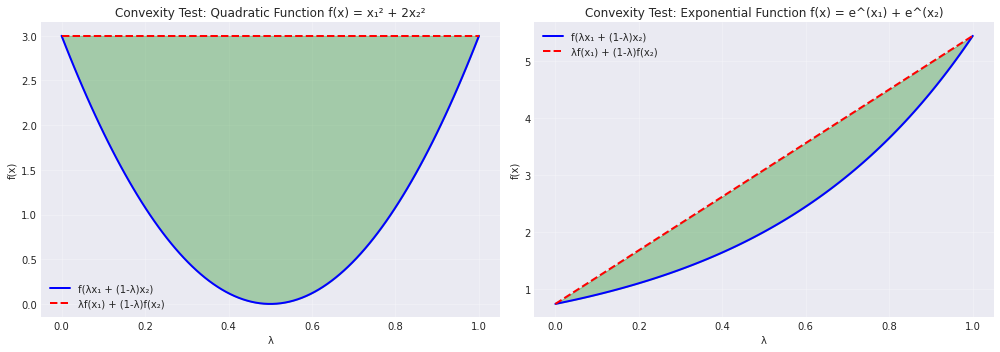

Quadratic function is convex: True
Exponential function is convex: True


In [5]:
# Example 1.2: Convex Functions
def quadratic_function(x):
    """Quadratic function: f(x) = x₁² + 2x₂²"""
    return x[0]**2 + 2*x[1]**2

def convex_exponential(x):
    """Exponential function: f(x) = e^(x₁) + e^(x₂) (convex)"""
    return np.exp(x[0]) + np.exp(x[1])

# Test convexity
x1 = np.array([1.0, 1.0])
x2 = np.array([-1.0, -1.0])
lambda_vals = np.linspace(0, 1, 100)

# For quadratic function
lhs_quad = [quadratic_function(lam * x1 + (1 - lam) * x2) for lam in lambda_vals]
rhs_quad = [lam * quadratic_function(x1) + (1 - lam) * quadratic_function(x2) for lam in lambda_vals]

# For exponential function
lhs_exp = [convex_exponential(lam * x1 + (1 - lam) * x2) for lam in lambda_vals]
rhs_exp = [lam * convex_exponential(x1) + (1 - lam) * convex_exponential(x2) for lam in lambda_vals]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Quadratic function convexity
axes[0].plot(lambda_vals, lhs_quad, 'b-', linewidth=2, label='f(λx₁ + (1-λ)x₂)')
axes[0].plot(lambda_vals, rhs_quad, 'r--', linewidth=2, label='λf(x₁) + (1-λ)f(x₂)')
axes[0].fill_between(lambda_vals, lhs_quad, rhs_quad, alpha=0.3, color='green')
axes[0].set_xlabel('λ')
axes[0].set_ylabel('f(x)')
axes[0].set_title('Convexity Test: Quadratic Function f(x) = x₁² + 2x₂²')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Exponential function convexity
axes[1].plot(lambda_vals, lhs_exp, 'b-', linewidth=2, label='f(λx₁ + (1-λ)x₂)')
axes[1].plot(lambda_vals, rhs_exp, 'r--', linewidth=2, label='λf(x₁) + (1-λ)f(x₂)')
axes[1].fill_between(lambda_vals, lhs_exp, rhs_exp, alpha=0.3, color='green')
axes[1].set_xlabel('λ')
axes[1].set_ylabel('f(x)')
axes[1].set_title('Convexity Test: Exponential Function f(x) = e^(x₁) + e^(x₂)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check if convexity is satisfied
is_convex_quad = all(np.array(lhs_quad) <= np.array(rhs_quad) + 1e-10)
is_convex_exp = all(np.array(lhs_exp) <= np.array(rhs_exp) + 1e-10)

print(f"Quadratic function is convex: {is_convex_quad}")
print(f"Exponential function is convex: {is_convex_exp}")

### 1.3 Nonlinear Functions
Functions that are not linear. Quadratic functions f(x) = x^T Q x are a type of nonlinear function.

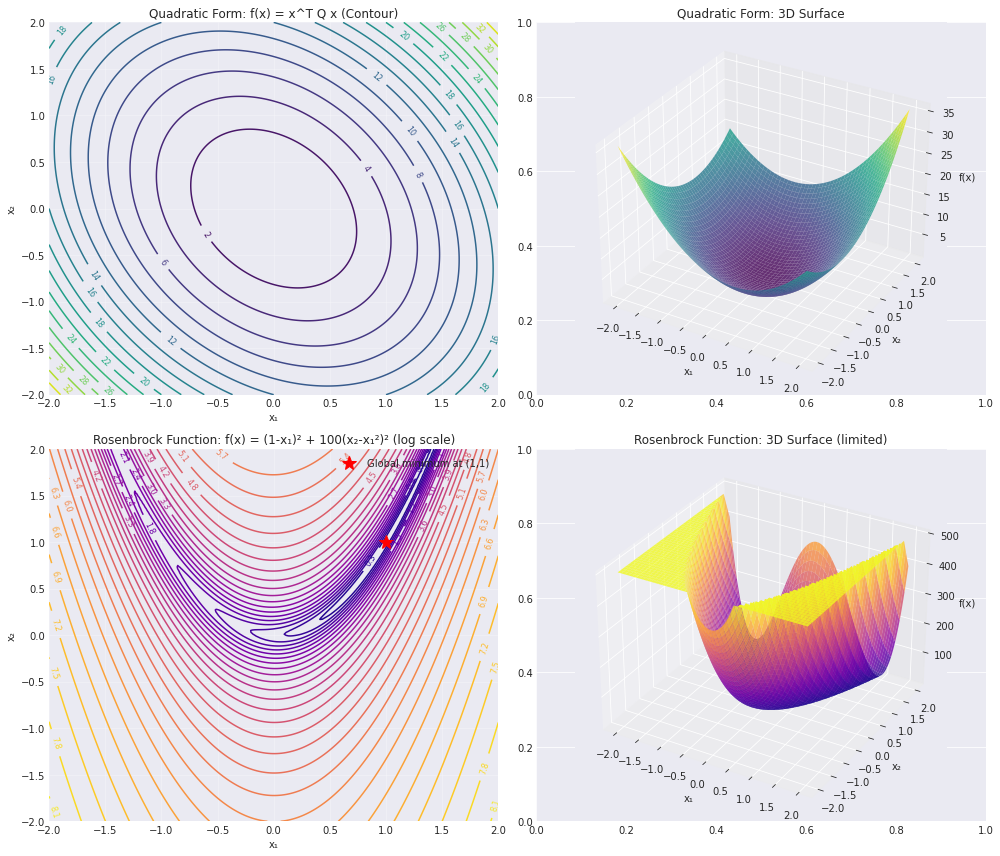

Nonlinear functions are more complex and often require iterative methods for optimization.


In [6]:
# Example 1.3: Nonlinear Functions
def quadratic_form(x, Q):
    """Quadratic form: f(x) = x^T Q x"""
    return x @ Q @ x

def rosenbrock_function(x):
    """Rosenbrock function: f(x) = (1-x₁)² + 100(x₂-x₁²)²"""
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Example quadratic form with positive definite matrix
Q = np.array([[4, 1], [1, 3]])

# Visualize nonlinear functions
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)

# Quadratic form
Z_quad = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_quad[i, j] = quadratic_form(np.array([X[i, j], Y[i, j]]), Q)

# Rosenbrock function
Z_rosenbrock = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_rosenbrock[i, j] = rosenbrock_function(np.array([X[i, j], Y[i, j]]))

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Quadratic form contour
contour1 = axes[0, 0].contour(X, Y, Z_quad, levels=20, cmap='viridis')
axes[0, 0].clabel(contour1, inline=True, fontsize=8)
axes[0, 0].set_xlabel('x₁')
axes[0, 0].set_ylabel('x₂')
axes[0, 0].set_title('Quadratic Form: f(x) = x^T Q x (Contour)')
axes[0, 0].grid(True, alpha=0.3)

# Quadratic form 3D
ax_3d = fig.add_subplot(2, 2, 2, projection='3d')
ax_3d.plot_surface(X, Y, Z_quad, cmap='viridis', alpha=0.8)
ax_3d.set_xlabel('x₁')
ax_3d.set_ylabel('x₂')
ax_3d.set_zlabel('f(x)')
ax_3d.set_title('Quadratic Form: 3D Surface')

# Rosenbrock contour
contour2 = axes[1, 0].contour(X, Y, np.log(Z_rosenbrock + 1), levels=30, cmap='plasma')
axes[1, 0].clabel(contour2, inline=True, fontsize=8)
axes[1, 0].plot(1, 1, 'r*', markersize=15, label='Global minimum at (1,1)')
axes[1, 0].set_xlabel('x₁')
axes[1, 0].set_ylabel('x₂')
axes[1, 0].set_title('Rosenbrock Function: f(x) = (1-x₁)² + 100(x₂-x₁²)² (log scale)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Rosenbrock 3D
ax_3d2 = fig.add_subplot(2, 2, 4, projection='3d')
Z_rosenbrock_limited = np.minimum(Z_rosenbrock, 500)  # Limit for visualization
ax_3d2.plot_surface(X, Y, Z_rosenbrock_limited, cmap='plasma', alpha=0.8)
ax_3d2.set_xlabel('x₁')
ax_3d2.set_ylabel('x₂')
ax_3d2.set_zlabel('f(x)')
ax_3d2.set_title('Rosenbrock Function: 3D Surface (limited)')

plt.tight_layout()
plt.show()

print("Nonlinear functions are more complex and often require iterative methods for optimization.")

---
## Part 2: Unconstrained Optimization

### 2.1 Single-Variable Unconstrained Optimization
Find x* that maximizes f(x) where f(x) is continuously differentiable.

Example 2.1: Single-Variable Optimization
Problem: max f(x) = 1000000 + 4000x - x²

Analytical Solution:
First-order condition: f'(x*) = 4000 - 2x = 0
Optimal point: x* = 2000
Second derivative: f''(x) = -2 < 0 ✓ (Maximum)
Optimal value: f(x*) = 5,000,000

Numerical Solution (SciPy):
Optimal point: x* = 2000.000000
Optimal value: f(x*) = 5,000,000.00
Error: 0.00e+00



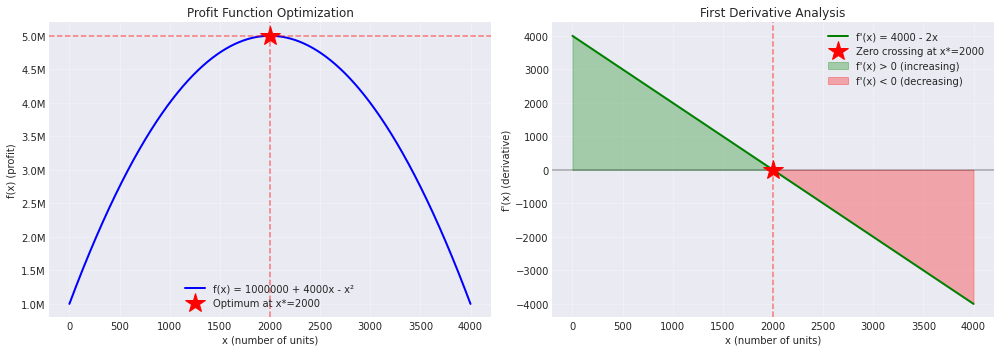

In [7]:
# Example 2.1: Single-variable optimization (from slides)
# Problem: max f(x) = 1000000 + 4000x - x²

def profit_function(x):
    """Profit function: f(x) = 1000000 + 4000x - x²"""
    return 1000000 + 4000*x - x**2

def profit_derivative(x):
    """Derivative: f'(x) = 4000 - 2x"""
    return 4000 - 2*x

def profit_second_derivative(x):
    """Second derivative: f''(x) = -2"""
    return -2

# Analytical solution
x_optimal_analytical = 2000
f_optimal_analytical = profit_function(x_optimal_analytical)

print("="*60)
print("Example 2.1: Single-Variable Optimization")
print("="*60)
print(f"Problem: max f(x) = 1000000 + 4000x - x²")
print()
print("Analytical Solution:")
print(f"First-order condition: f'(x*) = 4000 - 2x = 0")
print(f"Optimal point: x* = {x_optimal_analytical}")
print(f"Second derivative: f''(x) = {profit_second_derivative(x_optimal_analytical)} < 0 ✓ (Maximum)")
print(f"Optimal value: f(x*) = {f_optimal_analytical:,.0f}")
print()

# Numerical solution using scipy
result = minimize_scalar(lambda x: -profit_function(x), bounds=(0, 5000), method='bounded')
x_optimal_numerical = result.x
f_optimal_numerical = -result.fun

print("Numerical Solution (SciPy):")
print(f"Optimal point: x* = {x_optimal_numerical:.6f}")
print(f"Optimal value: f(x*) = {f_optimal_numerical:,.2f}")
print(f"Error: {abs(x_optimal_analytical - x_optimal_numerical):.2e}")
print()

# Visualization
x_range = np.linspace(0, 4000, 1000)
f_values = profit_function(x_range)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Function plot
ax1.plot(x_range, f_values, 'b-', linewidth=2, label='f(x) = 1000000 + 4000x - x²')
ax1.plot(x_optimal_analytical, f_optimal_analytical, 'r*', markersize=20, label=f'Optimum at x*={x_optimal_analytical}')
ax1.axvline(x_optimal_analytical, color='r', linestyle='--', alpha=0.5)
ax1.axhline(f_optimal_analytical, color='r', linestyle='--', alpha=0.5)
ax1.set_xlabel('x (number of units)')
ax1.set_ylabel('f(x) (profit)')
ax1.set_title('Profit Function Optimization')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Derivative plot
derivative_values = profit_derivative(x_range)
ax2.plot(x_range, derivative_values, 'g-', linewidth=2, label="f'(x) = 4000 - 2x")
ax2.axhline(0, color='k', linestyle='-', alpha=0.3)
ax2.plot(x_optimal_analytical, 0, 'r*', markersize=20, label='Zero crossing at x*=2000')
ax2.axvline(x_optimal_analytical, color='r', linestyle='--', alpha=0.5)
ax2.fill_between(x_range, 0, derivative_values, where=(derivative_values > 0), alpha=0.3, color='green', label='f\'(x) > 0 (increasing)')
ax2.fill_between(x_range, 0, derivative_values, where=(derivative_values < 0), alpha=0.3, color='red', label='f\'(x) < 0 (decreasing)')
ax2.set_xlabel('x (number of units)')
ax2.set_ylabel("f'(x) (derivative)")
ax2.set_title('First Derivative Analysis')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.2 Multi-Variable Unconstrained Optimization
Find **x*** that maximizes f(x₁, x₂, ..., xₙ)

Example 2.2: Multi-Variable Optimization
Problem: max f(x₁, x₂) = 1000000 + 300x₁ + 500x₂ - x₁² - x₂²

Analytical Solution:
First-order conditions:
  ∂f/∂x₁ = 300 - 2x₁ = 0  =>  x₁* = 150
  ∂f/∂x₂ = 500 - 2x₂ = 0  =>  x₂* = 250

Optimal point: x* = [150 250]
Optimal value: f(x*) = 1,085,000

Second-order condition (Hessian):
H = 
[[-2  0]
 [ 0 -2]]
Eigenvalues: [-2. -2.]
Negative definite (all eigenvalues < 0): True ✓ (Maximum)

Numerical Solution (SciPy - BFGS):
Optimal point: x* = [150.00163402 249.99876554]
Optimal value: f(x*) = 1,085,000.00
Error in x₁: 1.63e-03
Error in x₂: 1.23e-03



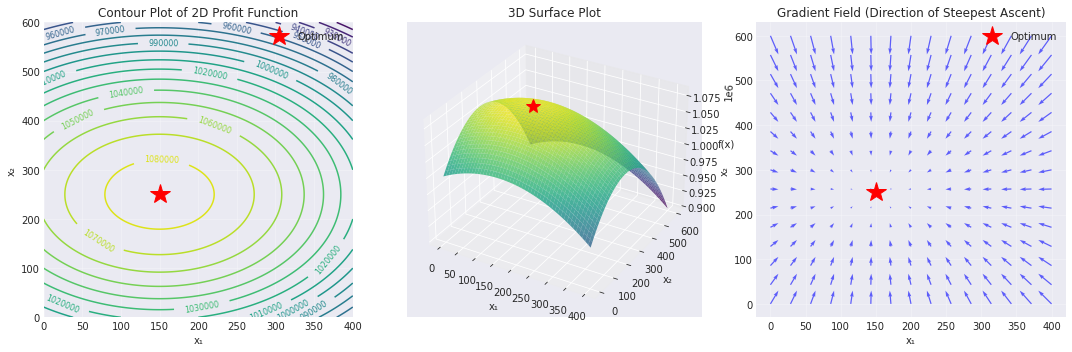

In [8]:
# Example 2.2: Multi-variable optimization (from slides)
# Problem: max f(x₁, x₂) = 1000000 + 300x₁ + 500x₂ - x₁² - x₂²

def profit_2d(x):
    """2D profit function: f(x₁, x₂) = 1000000 + 300x₁ + 500x₂ - x₁² - x₂²"""
    return 1000000 + 300*x[0] + 500*x[1] - x[0]**2 - x[1]**2

def profit_2d_gradient(x):
    """Gradient: ∇f = [300 - 2x₁, 500 - 2x₂]"""
    return np.array([300 - 2*x[0], 500 - 2*x[1]])

def profit_2d_hessian(x):
    """Hessian matrix: H = [[-2, 0], [0, -2]]"""
    return np.array([[-2, 0], [0, -2]])

# Analytical solution
# From first-order conditions: 300 - 2x₁ = 0 and 500 - 2x₂ = 0
x_optimal_analytical = np.array([150, 250])
f_optimal_analytical = profit_2d(x_optimal_analytical)

print("="*60)
print("Example 2.2: Multi-Variable Optimization")
print("="*60)
print(f"Problem: max f(x₁, x₂) = 1000000 + 300x₁ + 500x₂ - x₁² - x₂²")
print()
print("Analytical Solution:")
print(f"First-order conditions:")
print(f"  ∂f/∂x₁ = 300 - 2x₁ = 0  =>  x₁* = 150")
print(f"  ∂f/∂x₂ = 500 - 2x₂ = 0  =>  x₂* = 250")
print()
print(f"Optimal point: x* = {x_optimal_analytical}")
print(f"Optimal value: f(x*) = {f_optimal_analytical:,.0f}")
print()
print("Second-order condition (Hessian):")
H = profit_2d_hessian(x_optimal_analytical)
eigenvalues = np.linalg.eigvals(H)
print(f"H = \n{H}")
print(f"Eigenvalues: {eigenvalues}")
print(f"Negative definite (all eigenvalues < 0): {all(eigenvalues < 0)} ✓ (Maximum)")
print()

# Numerical solution
result = minimize(lambda x: -profit_2d(x), x0=np.array([0, 0]), method='BFGS')
x_optimal_numerical = result.x
f_optimal_numerical = -result.fun

print("Numerical Solution (SciPy - BFGS):")
print(f"Optimal point: x* = {x_optimal_numerical}")
print(f"Optimal value: f(x*) = {f_optimal_numerical:,.2f}")
print(f"Error in x₁: {abs(x_optimal_analytical[0] - x_optimal_numerical[0]):.2e}")
print(f"Error in x₂: {abs(x_optimal_analytical[1] - x_optimal_numerical[1]):.2e}")
print()

# Visualization
x1 = np.linspace(0, 400, 200)
x2 = np.linspace(0, 600, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = 1000000 + 300*X1 + 500*X2 - X1**2 - X2**2

fig = plt.figure(figsize=(15, 5))

# Contour plot
ax1 = fig.add_subplot(131)
contour = ax1.contour(X1, X2, Z, levels=20, cmap='viridis')
ax1.clabel(contour, inline=True, fontsize=8)
ax1.plot(x_optimal_analytical[0], x_optimal_analytical[1], 'r*', markersize=20, label='Optimum')
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('Contour Plot of 2D Profit Function')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 3D surface
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax2.plot([x_optimal_analytical[0]], [x_optimal_analytical[1]], [f_optimal_analytical], 'r*', markersize=15)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_zlabel('f(x)')
ax2.set_title('3D Surface Plot')

# Gradient field
ax3 = fig.add_subplot(133)
x1_grid = np.linspace(0, 400, 15)
x2_grid = np.linspace(0, 600, 15)
X1_grid, X2_grid = np.meshgrid(x1_grid, x2_grid)
U = 300 - 2*X1_grid
V = 500 - 2*X2_grid
ax3.quiver(X1_grid, X2_grid, U, V, alpha=0.6, color='blue')
ax3.plot(x_optimal_analytical[0], x_optimal_analytical[1], 'r*', markersize=20, label='Optimum')
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title('Gradient Field (Direction of Steepest Ascent)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Additional Examples: Rosenbrock and Sphere Functions

Example 2.3: Optimization of Standard Test Functions

1. SPHERE FUNCTION: f(x) = Σ xᵢ²
----------------------------------------
Initial point: [5. 5. 5.]
Optimal point: [-6.87627692e-09 -6.87627552e-09 -7.36047301e-09]
Optimal value: 1.49e-16
Success: True
Iterations: 4

2. ROSENBROCK FUNCTION: f(x) = Σ [100(x_{i+1} - xᵢ²)² + (1 - xᵢ)²]
----------------------------------------
Initial point: [-1.2  1. ]
Optimal point: [0.99999536 0.99999071]
Optimal value: 2.15e-11
Success: True
Iterations: 32

3. RASTRIGIN FUNCTION: f(x) = 10n + Σ [xᵢ² - 10cos(2πxᵢ)]
----------------------------------------
Initial point: [2. 2.]
Optimal point: [1.98991223 1.98991223]
Optimal value: 7.96e+00
Success: True
Iterations: 3
Note: Rastrigin is highly multimodal; local optimum found.



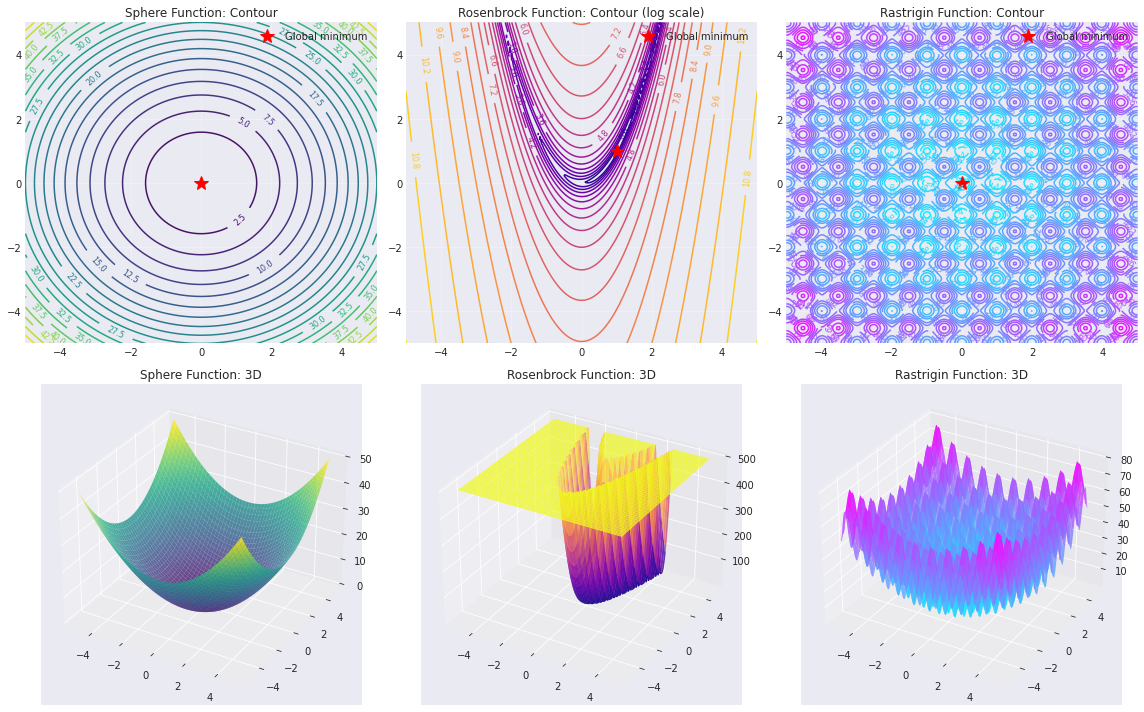

In [9]:
# Example 2.3: Additional unconstrained optimization examples

def sphere_function(x):
    """Sphere function: f(x) = Σ xᵢ²"""
    return np.sum(x**2)

def rosenbrock_function(x):
    """Rosenbrock function: f(x) = Σ [100(x_{i+1} - xᵢ²)² + (1 - xᵢ)²]"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def rastrigin_function(x):
    """Rastrigin function: f(x) = 10n + Σ [xᵢ² - 10cos(2πxᵢ)]"""
    return 10*len(x) + sum(x**2 - 10*np.cos(2*np.pi*x))

print("="*60)
print("Example 2.3: Optimization of Standard Test Functions")
print("="*60)
print()

# Optimize Sphere function
print("1. SPHERE FUNCTION: f(x) = Σ xᵢ²")
print("-" * 40)
x0_sphere = np.array([5.0, 5.0, 5.0])
result_sphere = minimize(sphere_function, x0_sphere, method='BFGS')
print(f"Initial point: {x0_sphere}")
print(f"Optimal point: {result_sphere.x}")
print(f"Optimal value: {result_sphere.fun:.2e}")
print(f"Success: {result_sphere.success}")
print(f"Iterations: {result_sphere.nit}")
print()

# Optimize Rosenbrock function
print("2. ROSENBROCK FUNCTION: f(x) = Σ [100(x_{i+1} - xᵢ²)² + (1 - xᵢ)²]")
print("-" * 40)
x0_rosenbrock = np.array([-1.2, 1.0])
result_rosenbrock = minimize(rosenbrock_function, x0_rosenbrock, method='BFGS')
print(f"Initial point: {x0_rosenbrock}")
print(f"Optimal point: {result_rosenbrock.x}")
print(f"Optimal value: {result_rosenbrock.fun:.2e}")
print(f"Success: {result_rosenbrock.success}")
print(f"Iterations: {result_rosenbrock.nit}")
print()

# Optimize Rastrigin function (multimodal)
print("3. RASTRIGIN FUNCTION: f(x) = 10n + Σ [xᵢ² - 10cos(2πxᵢ)]")
print("-" * 40)
x0_rastrigin = np.array([2.0, 2.0])
result_rastrigin = minimize(rastrigin_function, x0_rastrigin, method='L-BFGS-B')
print(f"Initial point: {x0_rastrigin}")
print(f"Optimal point: {result_rastrigin.x}")
print(f"Optimal value: {result_rastrigin.fun:.2e}")
print(f"Success: {result_rastrigin.success}")
print(f"Iterations: {result_rastrigin.nit}")
print(f"Note: Rastrigin is highly multimodal; local optimum found.")
print()

# Visualization
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)

# Sphere
Z_sphere = X**2 + Y**2

# Rosenbrock
Z_rosenbrock = 100*(Y - X**2)**2 + (1 - X)**2

# Rastrigin
Z_rastrigin = 20 + X**2 + Y**2 - 10*(np.cos(2*np.pi*X) + np.cos(2*np.pi*Y))

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Sphere
contour1 = axes[0, 0].contour(X, Y, Z_sphere, levels=20, cmap='viridis')
axes[0, 0].clabel(contour1, inline=True, fontsize=8)
axes[0, 0].plot(0, 0, 'r*', markersize=15, label='Global minimum')
axes[0, 0].set_title('Sphere Function: Contour')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

ax = fig.add_subplot(2, 3, 4, projection='3d')
ax.plot_surface(X, Y, Z_sphere, cmap='viridis', alpha=0.8)
ax.set_title('Sphere Function: 3D')
ax.set_zlim(0, 50)

# Rosenbrock
contour2 = axes[0, 1].contour(X, Y, np.log(Z_rosenbrock + 1), levels=20, cmap='plasma')
axes[0, 1].clabel(contour2, inline=True, fontsize=8)
axes[0, 1].plot(1, 1, 'r*', markersize=15, label='Global minimum')
axes[0, 1].set_title('Rosenbrock Function: Contour (log scale)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

ax = fig.add_subplot(2, 3, 5, projection='3d')
Z_rosenbrock_limited = np.minimum(Z_rosenbrock, 500)
ax.plot_surface(X, Y, Z_rosenbrock_limited, cmap='plasma', alpha=0.8)
ax.set_title('Rosenbrock Function: 3D')

# Rastrigin
contour3 = axes[0, 2].contour(X, Y, Z_rastrigin, levels=20, cmap='cool')
axes[0, 2].clabel(contour3, inline=True, fontsize=8)
axes[0, 2].plot(0, 0, 'r*', markersize=15, label='Global minimum')
axes[0, 2].set_title('Rastrigin Function: Contour')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

ax = fig.add_subplot(2, 3, 6, projection='3d')
ax.plot_surface(X, Y, Z_rastrigin, cmap='cool', alpha=0.8)
ax.set_title('Rastrigin Function: 3D')

# Remove the middle row plots
axes[1, 0].remove()
axes[1, 1].remove()
axes[1, 2].remove()

plt.tight_layout()
plt.show()

---
## Part 3: Linear Programming (LP)

### 3.1 Linear Programming Formulation
**max c^T x** subject to **Ax ≤ b** and **A_eq x = b_eq**

Example 3.1: Linear Programming

Problem: Production Optimization
----------------------------------------
Maximize: 3x₁ + 2x₂ (profit)
Subject to:
  2x₁ + x₂ ≤ 100  (Resource 1)
  x₁ + x₂ ≤ 80    (Resource 2)
  x₁, x₂ ≥ 0

Solution (SciPy - linprog):
Optimal point: x₁ = 20.00, x₂ = 60.00
Optimal value: 180.00

Constraint verification:
  2x₁ + x₂ = 100.00 ≤ 100 ✓
  x₁ + x₂ = 80.00 ≤ 80 ✓
  x₁ = 20.00 ≥ 0 ✓
  x₂ = 60.00 ≥ 0 ✓



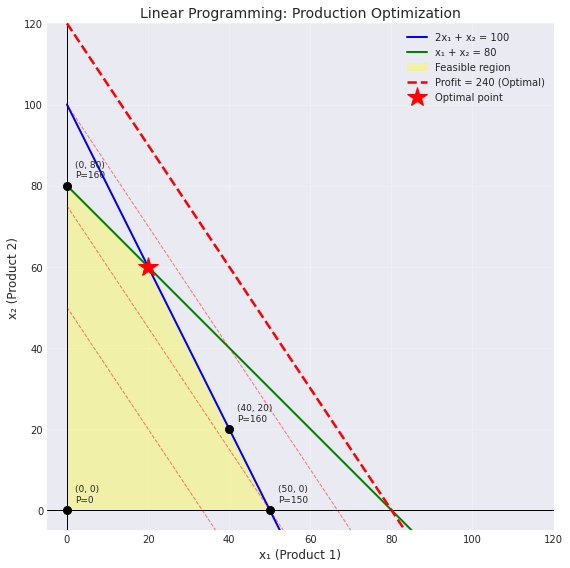

In [10]:
# Example 3.1: Linear Programming
print("="*60)
print("Example 3.1: Linear Programming")
print("="*60)
print()

# Problem: A company produces two products
# Maximize profit: 3x₁ + 2x₂
# Subject to:
# 2x₁ + x₂ ≤ 100  (Resource 1)
# x₁ + x₂ ≤ 80    (Resource 2)
# x₁, x₂ ≥ 0

print("Problem: Production Optimization")
print("-" * 40)
print("Maximize: 3x₁ + 2x₂ (profit)")
print("Subject to:")
print("  2x₁ + x₂ ≤ 100  (Resource 1)")
print("  x₁ + x₂ ≤ 80    (Resource 2)")
print("  x₁, x₂ ≥ 0")
print()

# Coefficients
c = np.array([3, 2])  # Objective coefficients (we'll minimize -c for maximization)
A_ub = np.array([[2, 1], [1, 1]])  # Inequality constraint matrix
b_ub = np.array([100, 80])  # Inequality constraint bounds
x_bounds = [(0, None), (0, None)]  # Non-negativity constraints

# Solve using linprog (minimizes c^T x, so we negate c)
result_lp = linprog(-c, A_ub=A_ub, b_ub=b_ub, bounds=x_bounds, method='highs')

print("Solution (SciPy - linprog):")
print(f"Optimal point: x₁ = {result_lp.x[0]:.2f}, x₂ = {result_lp.x[1]:.2f}")
print(f"Optimal value: {-result_lp.fun:.2f}")
print()

# Verify constraints
print("Constraint verification:")
print(f"  2x₁ + x₂ = {2*result_lp.x[0] + result_lp.x[1]:.2f} ≤ 100 ✓")
print(f"  x₁ + x₂ = {result_lp.x[0] + result_lp.x[1]:.2f} ≤ 80 ✓")
print(f"  x₁ = {result_lp.x[0]:.2f} ≥ 0 ✓")
print(f"  x₂ = {result_lp.x[1]:.2f} ≥ 0 ✓")
print()

# Visualization
x1 = np.linspace(0, 120, 500)

# Constraint lines
x2_constraint1 = 100 - 2*x1  # 2x₁ + x₂ = 100
x2_constraint2 = 80 - x1     # x₁ + x₂ = 80

# Objective function lines (isoprofit lines)
profit_levels = [100, 150, 200, 240]

fig, ax = plt.subplots(figsize=(10, 8))

# Plot constraints
ax.plot(x1, x2_constraint1, 'b-', linewidth=2, label='2x₁ + x₂ = 100')
ax.plot(x1, x2_constraint2, 'g-', linewidth=2, label='x₁ + x₂ = 80')
ax.axhline(0, color='k', linewidth=1)
ax.axvline(0, color='k', linewidth=1)

# Fill feasible region
x1_fill = np.linspace(0, 80, 100)
x2_upper = np.minimum(100 - 2*x1_fill, 80 - x1_fill)
x2_upper = np.maximum(x2_upper, 0)
ax.fill_between(x1_fill, 0, x2_upper, alpha=0.3, color='yellow', label='Feasible region')

# Plot isoprofit lines
for profit in profit_levels:
    x2_profit = (profit - 3*x1) / 2
    if profit == 240:
        ax.plot(x1, x2_profit, 'r--', linewidth=2.5, label=f'Profit = {profit} (Optimal)')
    else:
        ax.plot(x1, x2_profit, 'r--', linewidth=1, alpha=0.5)

# Plot optimal point
ax.plot(result_lp.x[0], result_lp.x[1], 'r*', markersize=20, label='Optimal point')

# Corner points
corners = [(0, 0), (0, 80), (40, 20), (50, 0)]
for corner in corners:
    profit = 3*corner[0] + 2*corner[1]
    ax.plot(corner[0], corner[1], 'ko', markersize=8)
    ax.text(corner[0]+2, corner[1]+2, f'({corner[0]}, {corner[1]})\nP={profit}', fontsize=9)

ax.set_xlim(-5, 120)
ax.set_ylim(-5, 120)
ax.set_xlabel('x₁ (Product 1)', fontsize=12)
ax.set_ylabel('x₂ (Product 2)', fontsize=12)
ax.set_title('Linear Programming: Production Optimization', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

---
## Part 4: Quadratic Programming (QP)

### 4.1 Quadratic Programming Formulation
**max (1/2) x^T Q x + c^T x** subject to **Ax ≤ b**

In [11]:
# Example 4.1: Quadratic Programming
print("="*60)
print("Example 4.1: Quadratic Programming")
print("="*60)
print()

# Problem: Portfolio optimization
# Minimize: (1/2) x^T Q x - r^T x  (minimize risk - expected return)
# Subject to: Σ xᵢ = 1 (budget constraint), xᵢ ≥ 0

# Covariance matrix (risk)
Q = np.array([[4, 1, 0.5],
              [1, 3, 0.2],
              [0.5, 0.2, 2]])

# Expected returns
r = np.array([0.05, 0.08, 0.06])

# Objective: minimize (1/2) x^T Q x - r^T x
def qp_objective(x):
    return 0.5 * x @ Q @ x - r @ x

def qp_gradient(x):
    return Q @ x - r

# Constraints: Σ xᵢ = 1, xᵢ ≥ 0
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(3)]

# Initial guess
x0 = np.array([0.33, 0.33, 0.34])

# Solve QP
result_qp = minimize(qp_objective, x0, method='SLSQP', bounds=bounds, constraints=constraints)

print("Problem: Portfolio Optimization")
print("-" * 40)
print("Minimize: (1/2) x^T Q x - r^T x  (Risk - Return)")
print("Subject to:")
print("  Σ xᵢ = 1 (Budget constraint)")
print("  xᵢ ≥ 0 (Non-negativity)")
print()
print(f"Covariance Matrix Q:\n{Q}")
print()
print(f"Expected Returns r: {r}")
print()
print("Solution:")
print(f"Optimal allocation: x = {result_qp.x}")
print(f"Allocation percentages: {result_qp.x * 100}%")
print(f"Objective value: {result_qp.fun:.6f}")
print(f"Expected return: {r @ result_qp.x:.6f}")
print(f"Portfolio variance: {result_qp.x @ Q @ result_qp.x:.6f}")
print(f"Portfolio std dev: {np.sqrt(result_qp.x @ Q @ result_qp.x):.6f}")
print()

# Compare with equal weighting
x_equal = np.array([1/3, 1/3, 1/3])
print("Comparison with equal weighting:")
print(f"Equal weights: {x_equal}")
print(f"Expected return: {r @ x_equal:.6f}")
print(f"Portfolio variance: {x_equal @ Q @ x_equal:.6f}")
print(f"Portfolio std dev: {np.sqrt(x_equal @ Q @ x_equal):.6f}")

Example 4.1: Quadratic Programming

Problem: Portfolio Optimization
----------------------------------------
Minimize: (1/2) x^T Q x - r^T x  (Risk - Return)
Subject to:
  Σ xᵢ = 1 (Budget constraint)
  xᵢ ≥ 0 (Non-negativity)

Covariance Matrix Q:
[[4.  1.  0.5]
 [1.  3.  0.2]
 [0.5 0.2 2. ]]

Expected Returns r: [0.05 0.08 0.06]

Solution:
Optimal allocation: x = [0.15064935 0.3203275  0.52902315]
Allocation percentages: [15.064935   32.03274982 52.90231519]%
Objective value: 0.536268
Expected return: 0.064900
Portfolio variance: 1.202337
Portfolio std dev: 1.096511

Comparison with equal weighting:
Equal weights: [0.33333333 0.33333333 0.33333333]
Expected return: 0.063333
Portfolio variance: 1.377778
Portfolio std dev: 1.173788


---
## Part 5: Nonlinear Programming (NLP)

### 5.1 Constrained Nonlinear Optimization

Example 5.1: Constrained Nonlinear Optimization

Problem: Minimize x₁ + x₂
Subject to: x₁² + x₂² - 2 = 0

Solutions from different starting points:
----------------------------------------

Start point 1: [1. 1.]
  Optimal point: [1. 1.]
  Objective value: 2.000000
  Constraint satisfied: 0.00e+00

Start point 2: [0.5 1.5]
  Optimal point: [-1. -1.]
  Objective value: -2.000000
  Constraint satisfied: 3.91e-12

Start point 3: [-1. -1.]
  Optimal point: [-1. -1.]
  Objective value: -2.000000
  Constraint satisfied: 0.00e+00

Analytical Solution (Lagrange Multipliers):
Constraint: Circle with radius √2
Minimize x₁ + x₂ on this circle
Critical points: (1, 1) and (-1, -1)
Minimum: f(-1, -1) = -2
Maximum: f(1, 1) = 2


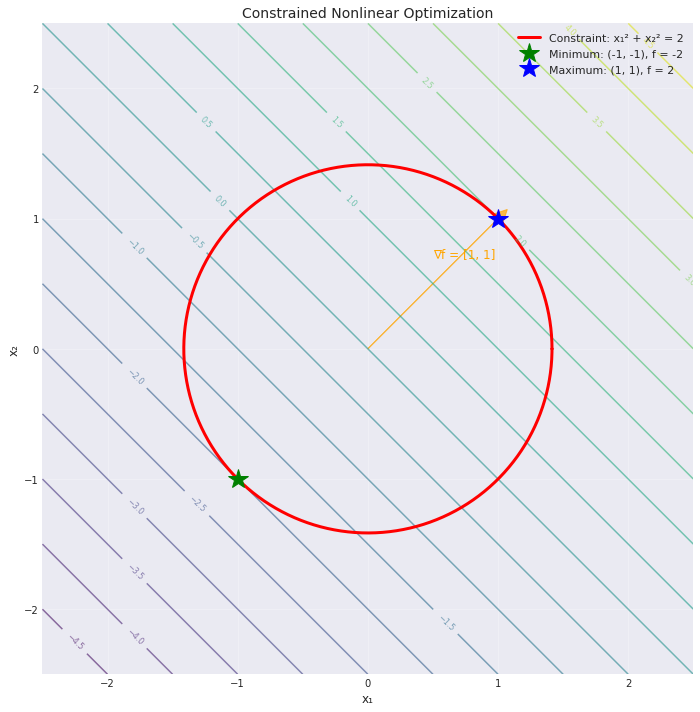

In [12]:
# Example 5.1: Constrained Nonlinear Optimization
print("="*60)
print("Example 5.1: Constrained Nonlinear Optimization")
print("="*60)
print()

# Problem from slides: min x₁ + x₂ subject to x₁² + x₂² - 2 = 0
def nlp_objective(x):
    """Objective: f(x) = x₁ + x₂"""
    return x[0] + x[1]

def nlp_constraint(x):
    """Constraint: x₁² + x₂² - 2 = 0"""
    return x[0]**2 + x[1]**2 - 2

print("Problem: Minimize x₁ + x₂")
print("Subject to: x₁² + x₂² - 2 = 0")
print()

# Constraints
constraints = {'type': 'eq', 'fun': nlp_constraint}

# Try different initial points
initial_points = [np.array([1.0, 1.0]), np.array([0.5, 1.5]), np.array([-1.0, -1.0])]

print("Solutions from different starting points:")
print("-" * 40)
solutions = []
for i, x0 in enumerate(initial_points):
    result = minimize(nlp_objective, x0, method='SLSQP', constraints=constraints)
    solutions.append(result)
    print(f"\nStart point {i+1}: {x0}")
    print(f"  Optimal point: {result.x}")
    print(f"  Objective value: {result.fun:.6f}")
    print(f"  Constraint satisfied: {nlp_constraint(result.x):.2e}")

# Analytical solution
# The constraint is a circle with radius √2
# Minimize x₁ + x₂ on this circle
# Using Lagrange multipliers: ∇f = λ∇h
# [1, 1]^T = λ[2x₁, 2x₂]^T
# This gives x₁ = x₂ and x₁² + x₂² = 2
# So 2x₁² = 2, x₁ = ±1
# Minimum at (-1, -1) with value -2

print("\n" + "="*40)
print("Analytical Solution (Lagrange Multipliers):")
print("="*40)
print("Constraint: Circle with radius √2")
print("Minimize x₁ + x₂ on this circle")
print("Critical points: (1, 1) and (-1, -1)")
print(f"Minimum: f(-1, -1) = -2")
print(f"Maximum: f(1, 1) = 2")

# Visualization
theta = np.linspace(0, 2*np.pi, 1000)
x1_circle = np.sqrt(2) * np.cos(theta)
x2_circle = np.sqrt(2) * np.sin(theta)

# Objective function level curves
x1_range = np.linspace(-2.5, 2.5, 100)
x2_range = np.linspace(-2.5, 2.5, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = X1 + X2

fig, ax = plt.subplots(figsize=(10, 10))

# Contour plot of objective
contour = ax.contour(X1, X2, Z, levels=20, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# Constraint (circle)
ax.plot(x1_circle, x2_circle, 'r-', linewidth=3, label='Constraint: x₁² + x₂² = 2')

# Optimal points
ax.plot(-1, -1, 'g*', markersize=20, label='Minimum: (-1, -1), f = -2')
ax.plot(1, 1, 'b*', markersize=20, label='Maximum: (1, 1), f = 2')

# Gradient direction
ax.arrow(0, 0, 1, 1, head_width=0.1, head_length=0.1, fc='orange', ec='orange', alpha=0.7)
ax.text(0.5, 0.7, '∇f = [1, 1]', fontsize=12, color='orange')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('Constrained Nonlinear Optimization', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

---
## Part 6: Gradient Descent Methods

### 6.1 Batch Gradient Descent

Example 6.1: Gradient Descent Methods

Batch Gradient Descent with different learning rates:
----------------------------------------
Initial point: [0. 0.]
Optimal point: [2, 3]

Learning rate = 0.01:
  Final point: [1.73476089 2.60214133]
  Final loss: 2.29e-01
  Iterations: 100

Learning rate = 0.05:
  Final point: [1.99994688 2.99992032]
  Final loss: 9.17e-09
  Iterations: 100

Converged at iteration 62
Learning rate = 0.1:
  Final point: [1.99999804 2.99999706]
  Final loss: 1.25e-11
  Iterations: 62

Converged at iteration 29
Learning rate = 0.2:
  Final point: [1.99999926 2.99999889]
  Final loss: 1.76e-12
  Iterations: 29



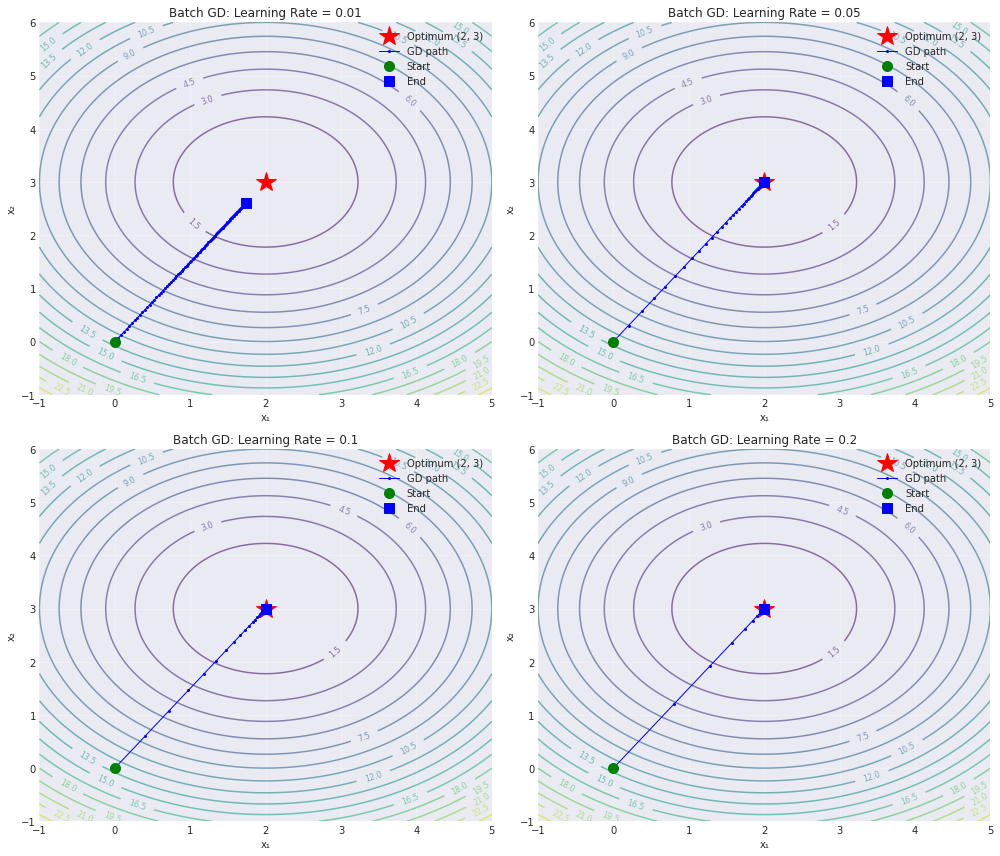

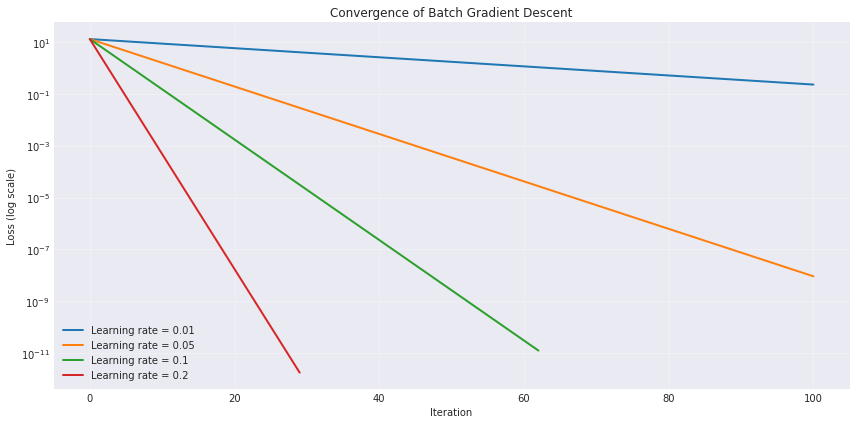

In [13]:
# Example 6.1: Gradient Descent Methods
print("="*60)
print("Example 6.1: Gradient Descent Methods")
print("="*60)
print()

# Simple quadratic function for demonstration
def quadratic_2d(x):
    """f(x) = (x₁ - 2)² + (x₂ - 3)²"""
    return (x[0] - 2)**2 + (x[1] - 3)**2

def quadratic_2d_gradient(x):
    """∇f = [2(x₁ - 2), 2(x₂ - 3)]"""
    return np.array([2*(x[0] - 2), 2*(x[1] - 3)])

# Batch Gradient Descent
def batch_gradient_descent(x0, learning_rate, max_iterations, tolerance=1e-6):
    """Batch Gradient Descent Algorithm"""
    x = x0.copy()
    history = [x.copy()]
    loss_history = [quadratic_2d(x)]
    
    for iteration in range(max_iterations):
        gradient = quadratic_2d_gradient(x)
        x_new = x - learning_rate * gradient
        
        history.append(x_new.copy())
        loss_history.append(quadratic_2d(x_new))
        
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Converged at iteration {iteration+1}")
            break
        
        x = x_new
    
    return np.array(history), np.array(loss_history)

# Test different learning rates
x0 = np.array([0.0, 0.0])
learning_rates = [0.01, 0.05, 0.1, 0.2]

print("Batch Gradient Descent with different learning rates:")
print("-" * 40)
print(f"Initial point: {x0}")
print(f"Optimal point: [2, 3]")
print()

results_bgd = {}
for lr in learning_rates:
    history, loss_history = batch_gradient_descent(x0, lr, 100)
    results_bgd[lr] = (history, loss_history)
    print(f"Learning rate = {lr}:")
    print(f"  Final point: {history[-1]}")
    print(f"  Final loss: {loss_history[-1]:.2e}")
    print(f"  Iterations: {len(history) - 1}")
    print()

# Visualization
x1 = np.linspace(-1, 5, 200)
x2 = np.linspace(-1, 6, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = (X1 - 2)**2 + (X2 - 3)**2

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, lr in enumerate(learning_rates):
    ax = axes[idx // 2, idx % 2]
    history, loss_history = results_bgd[lr]
    
    # Contour plot
    contour = ax.contour(X1, X2, Z, levels=20, cmap='viridis', alpha=0.6)
    ax.clabel(contour, inline=True, fontsize=8)
    
    # Optimal point
    ax.plot(2, 3, 'r*', markersize=20, label='Optimum (2, 3)')
    
    # Gradient descent path
    ax.plot(history[:, 0], history[:, 1], 'b.-', linewidth=1, markersize=4, label='GD path')
    ax.plot(history[0, 0], history[0, 1], 'go', markersize=10, label='Start')
    ax.plot(history[-1, 0], history[-1, 1], 'bs', markersize=10, label='End')
    
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title(f'Batch GD: Learning Rate = {lr}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Loss convergence plot
fig, ax = plt.subplots(figsize=(12, 6))

for lr in learning_rates:
    history, loss_history = results_bgd[lr]
    ax.semilogy(loss_history, linewidth=2, label=f'Learning rate = {lr}')

ax.set_xlabel('Iteration')
ax.set_ylabel('Loss (log scale)')
ax.set_title('Convergence of Batch Gradient Descent')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Stochastic Gradient Descent (SGD)

Example 6.2: Stochastic Gradient Descent (SGD)

Comparison of gradient descent variants:
----------------------------------------
True weights: [ 3. -2.]

Batch GD (batch_size=100):
  Final weights: [ 1.56424271 -1.24360713]
  Final loss: 2.111383

Mini-batch GD (batch_size=32):
  Final weights: [ 2.87175885 -1.96826486]
  Final loss: 0.028915

SGD (batch_size=1):
  Final weights: [ 3.01708663 -2.00300537]
  Final loss: 0.011374



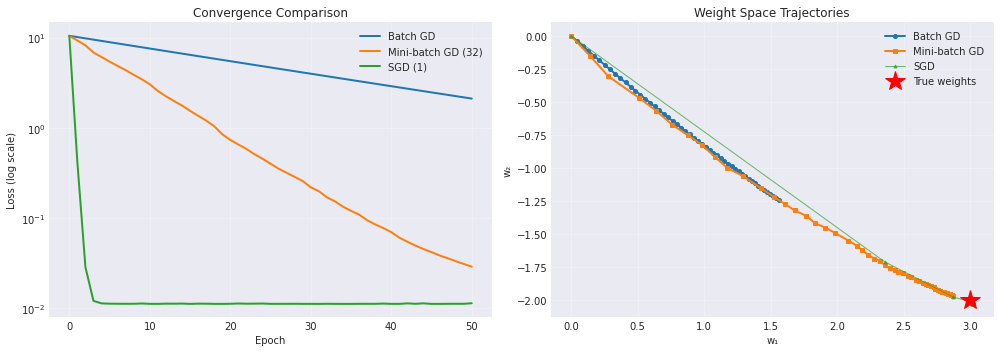

In [14]:
# Example 6.2: Stochastic Gradient Descent
print("="*60)
print("Example 6.2: Stochastic Gradient Descent (SGD)")
print("="*60)
print()

# Generate synthetic data for linear regression
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 2)
true_weights = np.array([3.0, -2.0])
y = X @ true_weights + np.random.randn(n_samples) * 0.1

# Loss function: MSE
def mse_loss(w, X, y):
    """Mean Squared Error Loss"""
    predictions = X @ w
    return np.mean((predictions - y)**2)

def mse_gradient(w, X, y):
    """Gradient of MSE"""
    predictions = X @ w
    return 2 * X.T @ (predictions - y) / len(y)

# SGD
def stochastic_gradient_descent(w0, X, y, learning_rate, epochs, batch_size=1):
    """Stochastic Gradient Descent"""
    w = w0.copy()
    history = [w.copy()]
    loss_history = [mse_loss(w, X, y)]
    
    n_samples = len(y)
    
    for epoch in range(epochs):
        # Shuffle data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        # Mini-batches
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            gradient = mse_gradient(w, X_batch, y_batch)
            w = w - learning_rate * gradient
        
        history.append(w.copy())
        loss_history.append(mse_loss(w, X, y))
    
    return np.array(history), np.array(loss_history)

# Compare different methods
w0 = np.array([0.0, 0.0])

print("Comparison of gradient descent variants:")
print("-" * 40)
print(f"True weights: {true_weights}")
print()

# Batch GD
history_batch, loss_batch = stochastic_gradient_descent(w0, X, y, 0.01, 50, batch_size=len(y))
print(f"Batch GD (batch_size={len(y)}):")
print(f"  Final weights: {history_batch[-1]}")
print(f"  Final loss: {loss_batch[-1]:.6f}")
print()

# Mini-batch GD
history_minibatch, loss_minibatch = stochastic_gradient_descent(w0, X, y, 0.01, 50, batch_size=32)
print(f"Mini-batch GD (batch_size=32):")
print(f"  Final weights: {history_minibatch[-1]}")
print(f"  Final loss: {loss_minibatch[-1]:.6f}")
print()

# SGD
history_sgd, loss_sgd = stochastic_gradient_descent(w0, X, y, 0.01, 50, batch_size=1)
print(f"SGD (batch_size=1):")
print(f"  Final weights: {history_sgd[-1]}")
print(f"  Final loss: {loss_sgd[-1]:.6f}")
print()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss convergence
axes[0].semilogy(loss_batch, linewidth=2, label='Batch GD')
axes[0].semilogy(loss_minibatch, linewidth=2, label='Mini-batch GD (32)')
axes[0].semilogy(loss_sgd, linewidth=2, label='SGD (1)')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (log scale)')
axes[0].set_title('Convergence Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Weight trajectories in 2D
axes[1].plot(history_batch[:, 0], history_batch[:, 1], 'o-', linewidth=2, label='Batch GD', markersize=4)
axes[1].plot(history_minibatch[:, 0], history_minibatch[:, 1], 's-', linewidth=2, label='Mini-batch GD', markersize=4)
axes[1].plot(history_sgd[:, 0], history_sgd[:, 1], '^-', linewidth=1, label='SGD', markersize=3, alpha=0.7)
axes[1].plot(true_weights[0], true_weights[1], 'r*', markersize=20, label='True weights')
axes[1].set_xlabel('w₁')
axes[1].set_ylabel('w₂')
axes[1].set_title('Weight Space Trajectories')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 Advanced Gradient Methods: Momentum and Adaptive Learning Rates

Example 6.3: Advanced Gradient Methods

Comparison of optimization algorithms:
----------------------------------------
SGD:         Final loss = 0.034517
Momentum:    Final loss = 0.011330
AdaGrad:     Final loss = 0.751192
Adam:        Final loss = 1.786712



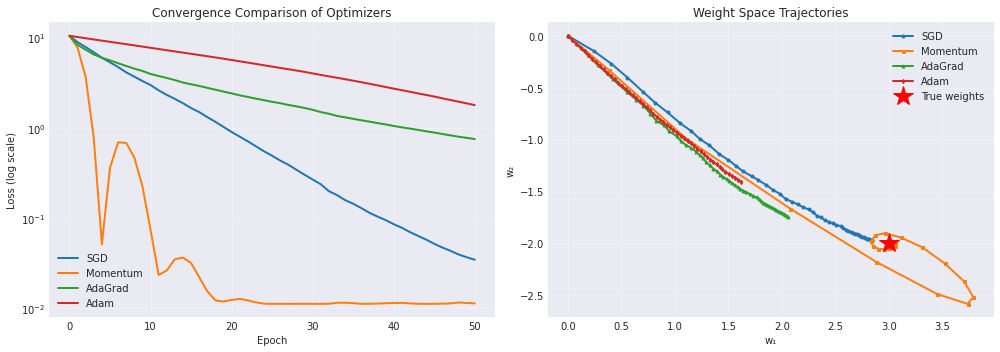

In [15]:
# Example 6.3: Advanced Gradient Methods
print("="*60)
print("Example 6.3: Advanced Gradient Methods")
print("="*60)
print()

# Gradient Descent with Momentum
def gradient_descent_momentum(w0, X, y, learning_rate, epochs, momentum=0.9, batch_size=32):
    """Gradient Descent with Momentum"""
    w = w0.copy()
    v = np.zeros_like(w)  # Velocity
    history = [w.copy()]
    loss_history = [mse_loss(w, X, y)]
    
    n_samples = len(y)
    
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            gradient = mse_gradient(w, X_batch, y_batch)
            v = momentum * v - learning_rate * gradient
            w = w + v
        
        history.append(w.copy())
        loss_history.append(mse_loss(w, X, y))
    
    return np.array(history), np.array(loss_history)

# AdaGrad
def adagrad(w0, X, y, learning_rate, epochs, batch_size=32, epsilon=1e-8):
    """AdaGrad Optimizer"""
    w = w0.copy()
    g_squared = np.zeros_like(w)  # Sum of squared gradients
    history = [w.copy()]
    loss_history = [mse_loss(w, X, y)]
    
    n_samples = len(y)
    
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            gradient = mse_gradient(w, X_batch, y_batch)
            g_squared += gradient**2
            w = w - learning_rate * gradient / (np.sqrt(g_squared) + epsilon)
        
        history.append(w.copy())
        loss_history.append(mse_loss(w, X, y))
    
    return np.array(history), np.array(loss_history)

# Adam
def adam(w0, X, y, learning_rate, epochs, batch_size=32, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """Adam Optimizer"""
    w = w0.copy()
    m = np.zeros_like(w)  # First moment
    v = np.zeros_like(w)  # Second moment
    t = 0  # Time step
    history = [w.copy()]
    loss_history = [mse_loss(w, X, y)]
    
    n_samples = len(y)
    
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            gradient = mse_gradient(w, X_batch, y_batch)
            t += 1
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * gradient**2
            m_hat = m / (1 - beta1**t)
            v_hat = v / (1 - beta2**t)
            w = w - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        
        history.append(w.copy())
        loss_history.append(mse_loss(w, X, y))
    
    return np.array(history), np.array(loss_history)

# Compare optimizers
w0 = np.array([0.0, 0.0])

print("Comparison of optimization algorithms:")
print("-" * 40)

history_sgd, loss_sgd = stochastic_gradient_descent(w0, X, y, 0.01, 50, batch_size=32)
history_momentum, loss_momentum = gradient_descent_momentum(w0, X, y, 0.01, 50, momentum=0.9, batch_size=32)
history_adagrad, loss_adagrad = adagrad(w0, X, y, 0.1, 50, batch_size=32)
history_adam, loss_adam = adam(w0, X, y, 0.01, 50, batch_size=32)

print(f"SGD:         Final loss = {loss_sgd[-1]:.6f}")
print(f"Momentum:    Final loss = {loss_momentum[-1]:.6f}")
print(f"AdaGrad:     Final loss = {loss_adagrad[-1]:.6f}")
print(f"Adam:        Final loss = {loss_adam[-1]:.6f}")
print()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss convergence
axes[0].semilogy(loss_sgd, linewidth=2, label='SGD')
axes[0].semilogy(loss_momentum, linewidth=2, label='Momentum')
axes[0].semilogy(loss_adagrad, linewidth=2, label='AdaGrad')
axes[0].semilogy(loss_adam, linewidth=2, label='Adam')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (log scale)')
axes[0].set_title('Convergence Comparison of Optimizers')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Weight trajectories
axes[1].plot(history_sgd[:, 0], history_sgd[:, 1], 'o-', linewidth=2, label='SGD', markersize=3)
axes[1].plot(history_momentum[:, 0], history_momentum[:, 1], 's-', linewidth=2, label='Momentum', markersize=3)
axes[1].plot(history_adagrad[:, 0], history_adagrad[:, 1], '^-', linewidth=2, label='AdaGrad', markersize=3)
axes[1].plot(history_adam[:, 0], history_adam[:, 1], 'd-', linewidth=2, label='Adam', markersize=3)
axes[1].plot(true_weights[0], true_weights[1], 'r*', markersize=20, label='True weights')
axes[1].set_xlabel('w₁')
axes[1].set_ylabel('w₂')
axes[1].set_title('Weight Space Trajectories')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Part 7: Summary and Key Takeaways

### Summary of Optimization Methods

In [16]:
print("="*70)
print("SUMMARY: OPTIMIZATION METHODS")
print("="*70)
print()

summary = """
1. FUNDAMENTALS
   - Linear functions: f(αx₁ + βx₂) = αf(x₁) + βf(x₂)
   - Convex functions: f(λx₁ + (1-λ)x₂) ≤ λf(x₁) + (1-λ)f(x₂)
   - Nonlinear functions: Functions that don't satisfy linearity

2. UNCONSTRAINED OPTIMIZATION
   - Find x* that maximizes/minimizes f(x)
   - First-order condition: ∇f(x*) = 0
   - Second-order condition: Hessian positive/negative definite
   - Methods: Gradient descent, Newton's method, BFGS, L-BFGS-B

3. LINEAR PROGRAMMING (LP)
   - Objective: max c^T x
   - Constraints: Ax ≤ b, A_eq x = b_eq
   - Optimal solution at corner points of feasible region
   - Method: Simplex algorithm, Interior point methods

4. QUADRATIC PROGRAMMING (QP)
   - Objective: max (1/2) x^T Q x + c^T x
   - Constraints: Linear constraints
   - Applications: Portfolio optimization, least squares problems
   - Methods: Active set, Interior point methods

5. NONLINEAR PROGRAMMING (NLP)
   - Objective: Nonlinear function
   - Constraints: Equality and inequality constraints
   - Karush-Kuhn-Tucker (KKT) conditions: Necessary conditions for optimality
   - Methods: Sequential Quadratic Programming (SQP), Augmented Lagrangian

6. GRADIENT DESCENT VARIANTS
   - Batch GD: Uses all data (slow, stable)
   - Stochastic GD: Uses one sample (fast, noisy)
   - Mini-batch GD: Uses batch of samples (balance between speed and stability)
   - Momentum: Accelerates convergence
   - AdaGrad: Adaptive learning rates per parameter
   - Adam: Combines momentum and adaptive learning rates

7. KEY CONCEPTS
   - Learning rate (η): Controls step size in gradient descent
   - Convergence: Algorithm reaches optimal solution
   - Local vs Global optimum: Local optima may not be global
   - Convexity: Guarantees global optimum for convex problems
   - Lagrange multipliers: Convert constrained to unconstrained problem

8. SCIPY TOOLS
   - scipy.optimize.minimize: General-purpose minimizer
   - scipy.optimize.linprog: Linear programming
   - scipy.optimize.minimize_scalar: Single-variable optimization
   - scipy.optimize.least_squares: Nonlinear least squares

9. APPLICATIONS IN MACHINE LEARNING
   - Training neural networks: Minimize loss function using gradient descent
   - Support Vector Machines: Quadratic programming problem
   - Logistic Regression: Convex optimization problem
   - Hyperparameter tuning: Grid search, Bayesian optimization
"""

print(summary)
print("="*70)

SUMMARY: OPTIMIZATION METHODS


1. FUNDAMENTALS
   - Linear functions: f(αx₁ + βx₂) = αf(x₁) + βf(x₂)
   - Convex functions: f(λx₁ + (1-λ)x₂) ≤ λf(x₁) + (1-λ)f(x₂)
   - Nonlinear functions: Functions that don't satisfy linearity

2. UNCONSTRAINED OPTIMIZATION
   - Find x* that maximizes/minimizes f(x)
   - First-order condition: ∇f(x*) = 0
   - Second-order condition: Hessian positive/negative definite
   - Methods: Gradient descent, Newton's method, BFGS, L-BFGS-B

3. LINEAR PROGRAMMING (LP)
   - Objective: max c^T x
   - Constraints: Ax ≤ b, A_eq x = b_eq
   - Optimal solution at corner points of feasible region
   - Method: Simplex algorithm, Interior point methods

4. QUADRATIC PROGRAMMING (QP)
   - Objective: max (1/2) x^T Q x + c^T x
   - Constraints: Linear constraints
   - Applications: Portfolio optimization, least squares problems
   - Methods: Active set, Interior point methods

5. NONLINEAR PROGRAMMING (NLP)
   - Objective: Nonlinear function
   - Constraints: Equality and 

---
## References and Further Reading

### Key References:
1. **Boyd, S., & Vandenberghe, L.** (2004). *Convex Optimization*. Cambridge University Press.
2. **Nocedal, J., & Wright, S. J.** (2006). *Numerical Optimization*. Springer.
3. **Goodfellow, I., Bengio, Y., & Courville, A.** (2016). *Deep Learning*. MIT Press.
4. **SciPy Documentation**: https://docs.scipy.org/doc/scipy/reference/optimize.html

### Topics for Further Exploration:
- Convex optimization theory
- Stochastic optimization
- Distributed optimization
- Evolutionary algorithms
- Reinforcement learning optimization
- Bayesian optimization

---
**Course**: DA5400W - Foundations of Machine Learning  
**Instructor**: Dr. Arun B Ayyar  
**Institution**: Indian Institute of Technology Madras  
**Practical Class**: Optimization Methods with SciPy